In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

In [3]:
train_copy = pd.read_csv('../datasets/data_con/train.csv').copy()

In [4]:
train_copy.drop('ID', axis = 1, inplace=True)

In [5]:
train_copy.head(2).T

,0,1
TARGET,0,0
성별,여성,남성
차량 소유 여부,1,1
부동산 소유 여부,1,0
자녀 수,2,0
연간 수입,18054000.0,59472000.0
수입 유형,연금수령자,근로자
최종 학력,고등학교 졸업,대학교 졸업 이상
결혼 여부,기혼,기혼
주거 형태,주택 / 아파트,주택 / 아파트


In [6]:
train_copy.loc[train_copy['산업군'].str[:2] == '사업', '산업군'] = '사업'
train_copy.loc[train_copy['산업군'].str[:2] == '기타', '산업군'] = '기타'
train_copy.loc[train_copy['산업군'].str[:2] == '무역', '산업군'] = '무역'
train_copy.loc[train_copy['산업군'].str[:2] == '산업', '산업군'] = '산업'
train_copy.loc[train_copy['산업군'].str[:2] == '운송', '산업군'] = '운송'

In [7]:
train_copy['산업군'].unique()

array(['기타', '사업', '산업', '무역', '전기', '운송', '학교', '의학', '자영업', '대학교', '군대',
       '레스토랑', '경찰', '은행', '통신', '정부', '건설', '문화', '호텔', '주택', '유치원',
       '우체부', '보안', '농업', '국가 안보', '보험', '서비스', '광고', '환경', '부동산 중개업',
       '법률 서비스', '모바일', '종교'], dtype=object)

In [8]:
from sklearn.preprocessing import LabelEncoder

# Label encoding for the '성별' column
label_encoder = LabelEncoder()
train_copy['성별'] = label_encoder.fit_transform(train_copy['성별'])
train_copy['수입 유형'] = label_encoder.fit_transform(train_copy['수입 유형'])
train_copy['최종 학력'] = label_encoder.fit_transform(train_copy['최종 학력'])
train_copy['결혼 여부'] = label_encoder.fit_transform(train_copy['결혼 여부'])
train_copy['주거 형태'] = label_encoder.fit_transform(train_copy['주거 형태'])
train_copy['직업'] = label_encoder.fit_transform(train_copy['직업'])
train_copy['산업군'] = label_encoder.fit_transform(train_copy['산업군'])


In [9]:
train_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TARGET          60000 non-null  int64  
 1   성별              60000 non-null  int32  
 2   차량 소유 여부        60000 non-null  int64  
 3   부동산 소유 여부       60000 non-null  int64  
 4   자녀 수            60000 non-null  int64  
 5   연간 수입           60000 non-null  float64
 6   수입 유형           60000 non-null  int32  
 7   최종 학력           60000 non-null  int32  
 8   결혼 여부           60000 non-null  int32  
 9   주거 형태           60000 non-null  int32  
 10  거주지 인구 비율       60000 non-null  float64
 11  휴대전화 소유 여부      60000 non-null  int64  
 12  업무용 휴대전화 소유 여부  60000 non-null  int64  
 13  이메일 소유 여부       60000 non-null  int64  
 14  직업              60000 non-null  int32  
 15  가족 구성원 수        60000 non-null  float64
 16  산업군             60000 non-null  int32  
 17  나이              60000 non-null 

In [10]:
train_copy.head(1)

,TARGET,성별,차량 소유 여부,부동산 소유 여부,자녀 수,연간 수입,수입 유형,최종 학력,결혼 여부,주거 형태,거주지 인구 비율,휴대전화 소유 여부,업무용 휴대전화 소유 여부,이메일 소유 여부,직업,가족 구성원 수,산업군,나이,근속연수,가입연수
0,0,2,1,1,2,18054000.0,5,0,0,3,0.00496,1,0,0,1,4.0,5,39,1000,23.0


In [11]:
# 자녀수 10 이상인 행 Drop
flag = train_copy['자녀 수'] > 10
train_copy = train_copy[~flag]

In [12]:
train_copy['인구수'] = train_copy['거주지 인구 비율'] * 51751065

In [13]:
train_copy.head(3)

,TARGET,성별,차량 소유 여부,부동산 소유 여부,자녀 수,연간 수입,수입 유형,최종 학력,결혼 여부,주거 형태,...,휴대전화 소유 여부,업무용 휴대전화 소유 여부,이메일 소유 여부,직업,가족 구성원 수,산업군,나이,근속연수,가입연수,인구수
0,0,2,1,1,2,18054000.0,5,0,0,3,...,1,0,0,1,4.0,5,39,1000,23.0,256685.282400
1,0,1,1,0,0,59472000.0,1,1,0,3,...,1,1,0,4,2.0,16,45,4,16.0,933019.950885
2,0,2,0,1,0,29736000.0,1,0,0,3,...,1,1,0,5,2.0,16,32,3,9.0,543386.182500


In [14]:
train_copy['인구수'] = train_copy['인구수'].round(0).astype(int)

In [15]:
train_copy.head(1)

,TARGET,성별,차량 소유 여부,부동산 소유 여부,자녀 수,연간 수입,수입 유형,최종 학력,결혼 여부,주거 형태,...,휴대전화 소유 여부,업무용 휴대전화 소유 여부,이메일 소유 여부,직업,가족 구성원 수,산업군,나이,근속연수,가입연수,인구수
0,0,2,1,1,2,18054000.0,5,0,0,3,...,1,0,0,1,4.0,5,39,1000,23.0,256685


In [16]:
# 거대도시 100만명 이상, 대도시 50만명 이상, 중소도시 10만명 이상에서 50만명 이하, 소도시 10만명 이하

In [17]:
train_copy['도시구분'] = pd.cut(train_copy['인구수'], bins=[0, 100000, 500000, 1000000, float('inf')], 
                      labels=['소도시', '중소도시', '대도시', '거대도시'])

In [18]:
train_copy.head(1)

,TARGET,성별,차량 소유 여부,부동산 소유 여부,자녀 수,연간 수입,수입 유형,최종 학력,결혼 여부,주거 형태,...,업무용 휴대전화 소유 여부,이메일 소유 여부,직업,가족 구성원 수,산업군,나이,근속연수,가입연수,인구수,도시구분
0,0,2,1,1,2,18054000.0,5,0,0,3,...,0,0,1,4.0,5,39,1000,23.0,256685,중소도시


In [19]:
train_copy['도시구분'].value_counts()

도시구분
거대도시    27760
대도시     17698
중소도시    14292
소도시       247
Name: count, dtype: int64

In [20]:
train_copy['소득수준'] = pd.cut(train_copy['연간 수입'], bins=[0, 50000000, 100000000, 150000000, 200000000, float('inf')], 
                    labels=['low', 'low-middle', 'middle', 'high-middle', 'high']) 

In [21]:
train_copy['소득수준'].value_counts()

소득수준
low            46314
low-middle     12449
middle           925
high-middle      228
high              81
Name: count, dtype: int64

In [22]:
train_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59997 entries, 0 to 59999
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   TARGET          59997 non-null  int64   
 1   성별              59997 non-null  int32   
 2   차량 소유 여부        59997 non-null  int64   
 3   부동산 소유 여부       59997 non-null  int64   
 4   자녀 수            59997 non-null  int64   
 5   연간 수입           59997 non-null  float64 
 6   수입 유형           59997 non-null  int32   
 7   최종 학력           59997 non-null  int32   
 8   결혼 여부           59997 non-null  int32   
 9   주거 형태           59997 non-null  int32   
 10  거주지 인구 비율       59997 non-null  float64 
 11  휴대전화 소유 여부      59997 non-null  int64   
 12  업무용 휴대전화 소유 여부  59997 non-null  int64   
 13  이메일 소유 여부       59997 non-null  int64   
 14  직업              59997 non-null  int32   
 15  가족 구성원 수        59997 non-null  float64 
 16  산업군             59997 non-null  int32   
 17  나이              5

In [23]:
# 파생변수 레이블 인코딩
label_encoder = LabelEncoder()
train_copy['도시구분'] = label_encoder.fit_transform(train_copy['도시구분'])
train_copy['소득수준'] = label_encoder.fit_transform(train_copy['소득수준'])

In [24]:
train_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59997 entries, 0 to 59999
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TARGET          59997 non-null  int64  
 1   성별              59997 non-null  int32  
 2   차량 소유 여부        59997 non-null  int64  
 3   부동산 소유 여부       59997 non-null  int64  
 4   자녀 수            59997 non-null  int64  
 5   연간 수입           59997 non-null  float64
 6   수입 유형           59997 non-null  int32  
 7   최종 학력           59997 non-null  int32  
 8   결혼 여부           59997 non-null  int32  
 9   주거 형태           59997 non-null  int32  
 10  거주지 인구 비율       59997 non-null  float64
 11  휴대전화 소유 여부      59997 non-null  int64  
 12  업무용 휴대전화 소유 여부  59997 non-null  int64  
 13  이메일 소유 여부       59997 non-null  int64  
 14  직업              59997 non-null  int32  
 15  가족 구성원 수        59997 non-null  float64
 16  산업군             59997 non-null  int32  
 17  나이              59997 non-null  int6

In [29]:
ind = pd.DataFrame(train_copy).to_csv('new_train.csv')

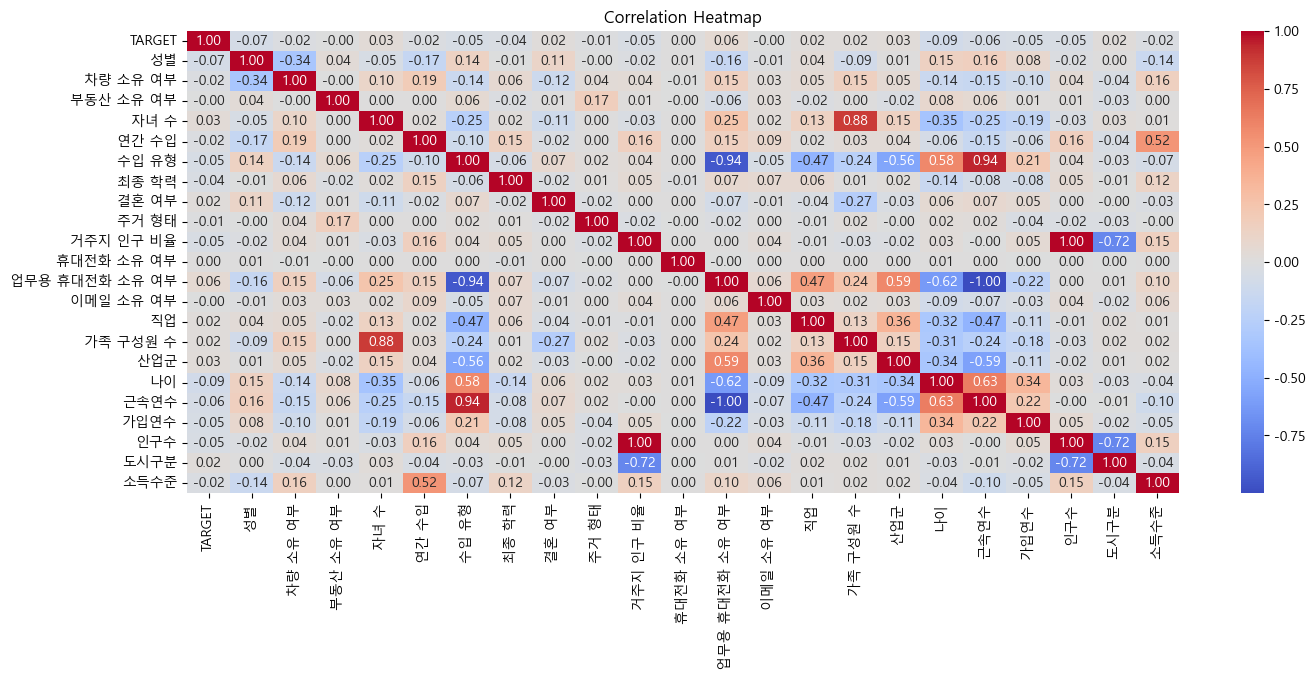

In [28]:
corr_matrix = train_copy.corr()

plt.figure(figsize=(16, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()